## Megatutorial 2

In [1]:
from pandas import read_csv

In [6]:
data = read_csv("../../data/fake_profiles.csv", index_col=0)

In [7]:
data.head(3)

,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,yes,0.27,0,0.0,no,53,no,no,32,1000.0,955,no
1,yes,0.00,2,0.0,no,44,no,no,286,2740.0,533,no
2,yes,0.10,2,0.0,no,0,no,yes,13,159.0,98,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   profile_pic                    576 non-null    object 
 1   rel_num_numeric_char_username  576 non-null    float64
 2   words_fullname                 576 non-null    int64  
 3   rel_num_numeric_char_fullname  576 non-null    float64
 4   name=username                  576 non-null    object 
 5   description_length             576 non-null    int64  
 6   has_external_url               576 non-null    object 
 7   is_private                     576 non-null    object 
 8   num_posts                      576 non-null    int64  
 9   num_followers                  556 non-null    float64
 10  num_follows                    576 non-null    int64  
 11  is_fake                        576 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 58.5+ 

In [11]:
features = [
    "rel_num_numeric_char_username",
    "words_fullname",
    "rel_num_numeric_char_fullname",
    "description_length"
]

targets = ["is_fake"]

X = data[features]
y = data[targets]

## Clustering in Scikit-Learn

```python
from sklearn.cluster
from sklearn.tree
from sklearn.neighbors
from sklearn.preprocessing
from sklearn.metrics
from sklearn.model_selection
```

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

### K-Means

In [47]:
kmeans_engine = KMeans(n_clusters=2)

# Entweder so ...
kmeans_engine.fit(X)
kmeans_engine.predict(X)

# ... oder so
kmeans_engine.fit_predict(X)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Agglomerative (Hierarchical) Clustering

In [48]:
hierarchical_engine = AgglomerativeClustering(n_clusters=3)
clusters = hierarchical_engine.fit_predict(X)

<Axes: xlabel='description_length', ylabel='words_fullname'>

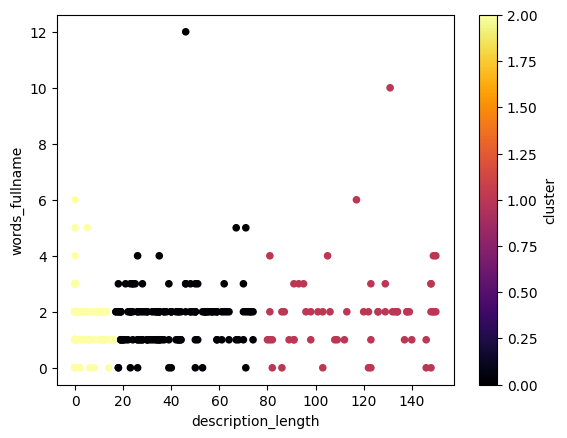

In [57]:
df = data.copy()
df["cluster"] = clusters

df.plot(
    kind="scatter",
    x="description_length", 
    y="words_fullname",
    c="cluster",
    cmap="inferno"
)

## Scipy Clustering

In [39]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

In [41]:
distances = hierarchy.linkage(X, method="ward")

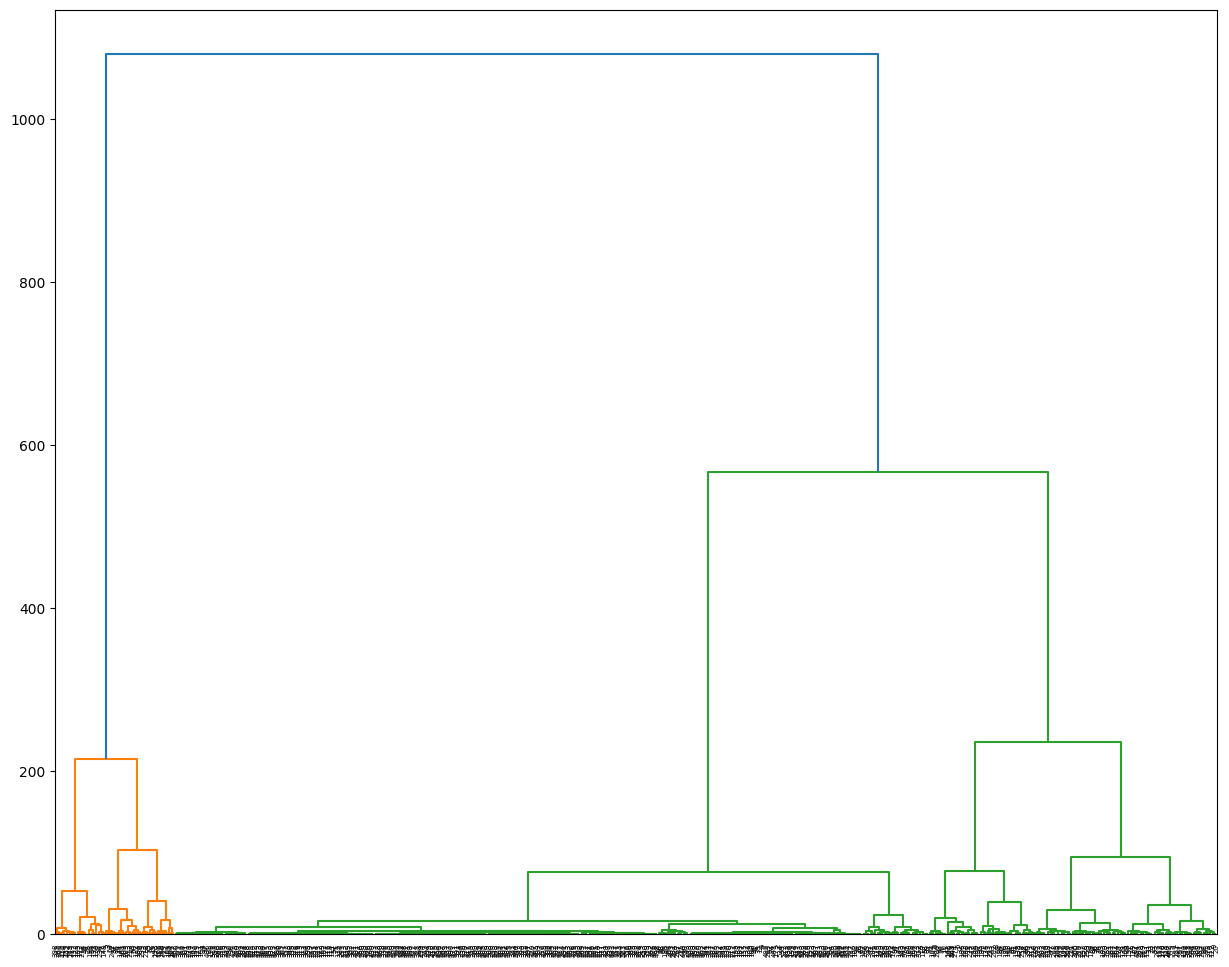

In [59]:
plt.figure(figsize=(15,12))
hierarchy.dendrogram(distances)
plt.show()